In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
import pathlib
import PIL
from PIL import Image
import time

In [2]:
print ('versão atual do tensorflow: {}'.format(tf.__version__))

versão atual do tensorflow: 2.2.0


In [3]:
diretorio = keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)
#diretorio = 'C:/Users/manuel/Documents/GitHub/Flower_Classification/flower_photos'
data_dir = pathlib.Path(diretorio)

lista = list(data_dir.glob('*')) # esta lista pega todas as pastas do diretorio, que vão representar suas classes
class_names = np.array([item.name for item in lista if item.name != 'LICENSE.txt'])

lista_imagens = list(data_dir.glob('*/*.jpg'))
# lista de todas as imagens independente do diretório

print (class_names)

228818944/228813984 [==============================] - 2s 0us/step
['tulips' 'roses' 'daisy' 'sunflowers' 'dandelion']


In [4]:
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)

BATCH_SIZE = 32
STEPS_EPOCH = np.ceil(len(lista_imagens)/BATCH_SIZE)

train_data_generator = data_generator.flow_from_directory(
    directory = diretorio,
    target_size= (220, 220),
    batch_size = BATCH_SIZE,
    shuffle = True, 
    classes = list(class_names),
    subset = 'training'
)

validation_data_generator = data_generator.flow_from_directory(
    directory = diretorio,
    target_size= (220, 220),
    batch_size = BATCH_SIZE,
    shuffle = True, 
    classes = list(class_names),
    subset = 'validation'
)

STEP_SIZE_TRAIN = train_data_generator.n // train_data_generator.batch_size
STEP_SIZE_VALID = validation_data_generator.n // validation_data_generator.batch_size

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


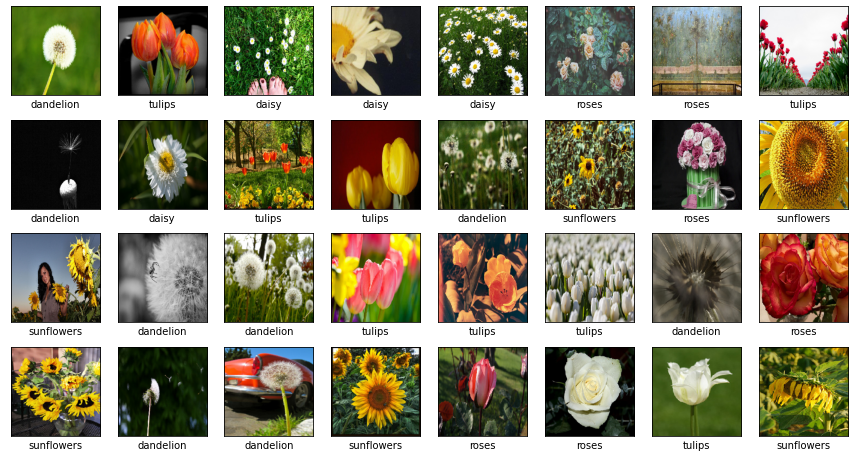

In [5]:
# fazendo uma análise das fotos importadas no train_data_generator
images_batch, labels_batch = next(train_data_generator)

plt.figure(figsize=(15,8))
for k in range(32):
    plt.subplot(4, 8, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[np.argmax(labels_batch[k])])
plt.show()

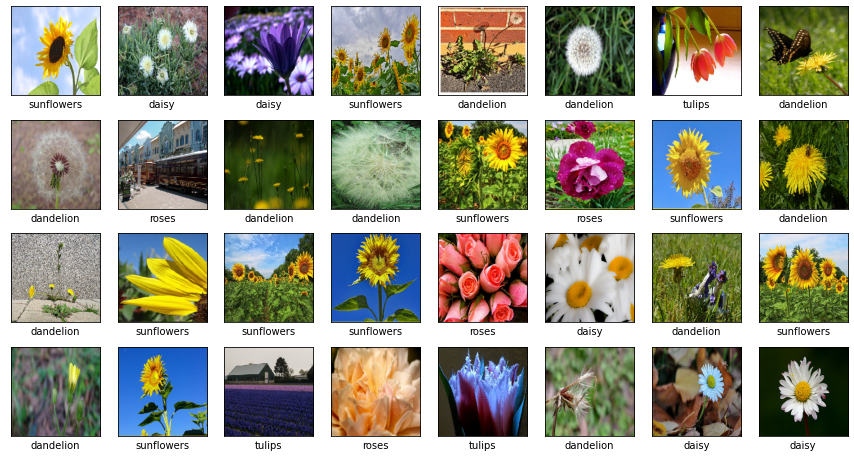

In [6]:
# fazendo uma análise das fotos importadas no validation_data_generator
images_batch, labels_batch = next(validation_data_generator)

plt.figure(figsize=(15,8))
for k in range(32):
    plt.subplot(4, 8, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[np.argmax(labels_batch[k])])
plt.show()

In [13]:
# com as imagens classificadas além e normalizadas, cria-se o modelo

model = keras.Sequential()

# primeira camada convolucional
model.add(keras.layers.Conv2D(filters=60, kernel_size=2, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.25))

# segunda camada convolucional
model.add(keras.layers.Conv2D(filters=120, kernel_size=6, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=6))
model.add(keras.layers.Dropout(rate=0.25))

# terceira camada convolucional
model.add(keras.layers.Conv2D(filters=60, kernel_size=4, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=4))
model.add(keras.layers.Dropout(rate=0.25))

# camada Flatten
model.add(keras.layers.Flatten())

# camada densa
model.add(keras.layers.Dense(128, activation='relu'))

# camada final
model.add(keras.layers.Dense(5, activation='softmax'))

# compilação
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
inicio_treinamento = time.time()

callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

model.fit_generator(
    generator = train_data_generator,
    steps_per_epoch = STEP_SIZE_TRAIN,
    epochs = 20,
    validation_data = validation_data_generator,
    validation_steps = STEP_SIZE_VALID,
    callbacks = [callback1]
)

tempo_treinamento = np.ceil(time.time() - inicio_treinamento)

print ('tempo total de treinamento: {} segundos'.format(tempo_treinamento))

Epoch 1/20
103/103 [==============================] - 13s 128ms/step - loss: 1.2829 - accuracy: 0.4294 - val_loss: 1.1884 - val_accuracy: 0.5170
Epoch 2/20
103/103 [==============================] - 13s 125ms/step - loss: 1.0629 - accuracy: 0.5614 - val_loss: 1.0852 - val_accuracy: 0.5767
Epoch 3/20
103/103 [==============================] - 13s 126ms/step - loss: 0.9225 - accuracy: 0.6478 - val_loss: 0.9681 - val_accuracy: 0.6108
Epoch 4/20
103/103 [==============================] - 13s 122ms/step - loss: 0.8058 - accuracy: 0.6817 - val_loss: 0.9048 - val_accuracy: 0.6335
Epoch 5/20
103/103 [==============================] - 13s 123ms/step - loss: 0.7548 - accuracy: 0.6958 - val_loss: 0.9390 - val_accuracy: 0.6193
Epoch 6/20
103/103 [==============================] - 13s 123ms/step - loss: 0.7246 - accuracy: 0.7114 - val_loss: 0.8865 - val_accuracy: 0.6591
Epoch 7/20
103/103 [==============================] - 13s 124ms/step - loss: 0.6836 - accuracy: 0.7346 - val_loss: 0.7970 - val_ac

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  780       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  259320    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_7 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [17]:
model.save('/content/gdrive/My Drive/Colab Notebooks/flower_class_model.h5')
print ('modelo salvo!')

modelo salvo!
